Assignement:MACHINE LEARNING 7, 8, 9, 10 & 11

1. Machine Learning 7
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.


In [35]:
## import pandas
from sklearn.model_selection import train_test_split

with open("D:/Assignment/nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)
print(nba.columns.values) # The names of all the columns in the data.
nba.fillna(0, inplace=True)
# The columns that we will be making predictions with.
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
# The column that we want to predict.
y_column = ["pts"]
X=nba[x_columns]
Y=nba[y_column]
x_train,x_test,y_train,y_test=train_test_split(X, Y,  random_state=42)
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(x_train, y_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(x_test)
predictions=np.ravel(predictions)
# Get the actual values for the test set.
import numpy as np
actual =np.ravel(y_test)


# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print("predictions[:10]:\n", predictions[:10])
print("actual[:10]:\n", actual[:10])
print(mse)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']
predictions[:10]:
 [ 610.2   84.4  331.  1350.6 1081.4  303.8   63.8  805.2  255.   342.8]
actual[:10]:
 [ 587   89  350 1417 1071  338   54  879  225  298]
3724.424793388429


2. In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.
Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
2.3. Problem

In [46]:
import requests
from bs4 import BeautifulSoup
import urllib.request
#import nltk
 
def count_words(url, the_word):
    #response = urllib.request.urlopen('http://php.net/')
    #html = response.read()
    #soup = BeautifulSoup(html,"html5lib")
    r = requests.get(url, allow_redirects=False)
    soup = BeautifulSoup(r.content, 'lxml')
    words = soup.find(text=lambda text: text and the_word in text)
    print(words)
    return len(words)
 
 

url = 'https://php.net/'
word = 'release'
count = count_words(url, word)
print('\nUrl: {}\ncontains {} occurrences of word: {}'.format(url, count, word))
 



The PHP development team announces the immediate availability of PHP 7.2.20.
     This is a bugfix release.

Url: https://php.net/
contains 107 occurrences of word: release


3.In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.

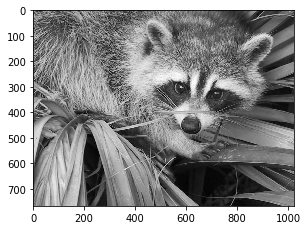

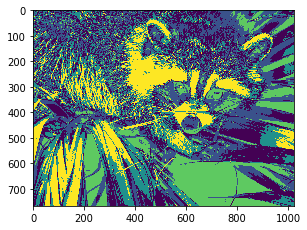

In [47]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

#print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 
 
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

4. In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


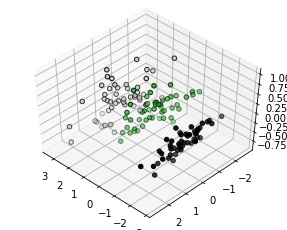

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

#label encoding the Target values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)




#Reducing the dimensions for 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)


#Visualising the 3D chart
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.show()

5.In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-
period#!ds =22r0&display=line



predicted=349.117716, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376367, expected=440.400000
predicted=348.154223, expected=315.900000
predicted=386.308894, expected=439.300000
predicted=356.081992, expected=401.300000
predicted=446.379475, expected=437.400000
predicted=394.737284, expected=575.500000
predicted=434.915612, expected=407.600000
predicted=507.923485, expected=682.000000
predicted=435.483001, expected=475.300000
predicted=652.743891, expected=581.300000
predicted=546.343555, expected=646.900000
Test MSE: 6958.324


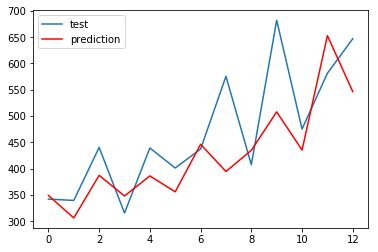

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt


df = pd.read_csv('D:/Assignment/shampoo.csv')
df.head()
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')
# remove the wrong data (last row)
df=df.dropna()
df=df.drop(columns=['Month'])
df.head()
df.set_index('Date',inplace=True)
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()